In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("train.csv")

#### Traditional Data Analysis process:

1. Define the question 
2. Process the data 
3. Clean the data
4. Analyze the data (EDA)
5. Data Modeling 
6. Visualize and share the findings

#### Question definition

Predict which passengers were transported by an anomaly using records recovered from the spaceship’s damaged computer system.

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [36]:
df.isnull().sum(axis = 0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
group             0
dtype: int64

In [43]:
(df.isnull().sum(axis = 0) / df.shape[0]).round(2)

PassengerId     0.00
HomePlanet      0.02
CryoSleep       0.02
Cabin           0.02
Destination     0.02
Age             0.02
VIP             0.02
RoomService     0.02
FoodCourt       0.02
ShoppingMall    0.02
Spa             0.02
VRDeck          0.02
Name            0.02
Transported     0.00
group           0.00
dtype: float64

#### Analysing the passenger ID

 A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always

Idea: Create two columns, one column with the person group using gggg, and another column using "pp" to say how many people went with the person

In [6]:
df["group"] = df["PassengerId"].str[:4]

In [7]:
df["PassengerId"].shape

(8693,)

In [8]:
len(df["group"].unique()) # There's 2400 people which are part of a group

6217

In [9]:
df["group"].value_counts() # The highest amount of people within one group is 8 and the lowest 1

group
4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: count, Length: 6217, dtype: int64

#### Analysing the HomePlanet

In [10]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x15553e390>,
 [Text(-0.14445288072599838, 1.0904739177302503, 'Earth'),
  Text(-0.5456478714190157, -0.955127426271436, 'Europa'),
  Text(0.8752009735838736, -0.6663507003356715, 'Mars')],
 [Text(-0.0787924803959991, 0.594803955125591, '54%'),
  Text(-0.29762611168309944, -0.520978596148056, '25%'),
  Text(0.4773823492275674, -0.36346401836491166, '21%')])

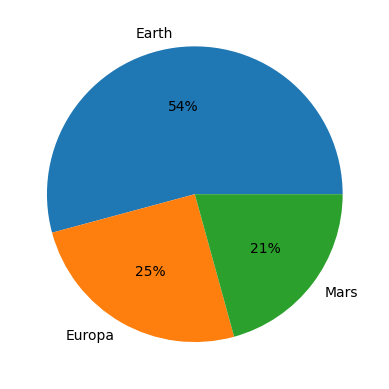

In [11]:
plt.pie(df["HomePlanet"].value_counts(), labels = df["HomePlanet"].value_counts().index,  autopct='%1.0f%%') 

The most common planet of origin is earth

Ideas: See the correlation between the planet and the transportation

In [12]:
df['Transported'] = df['Transported'].astype(int)

<Axes: xlabel='Transported', ylabel='Transported'>

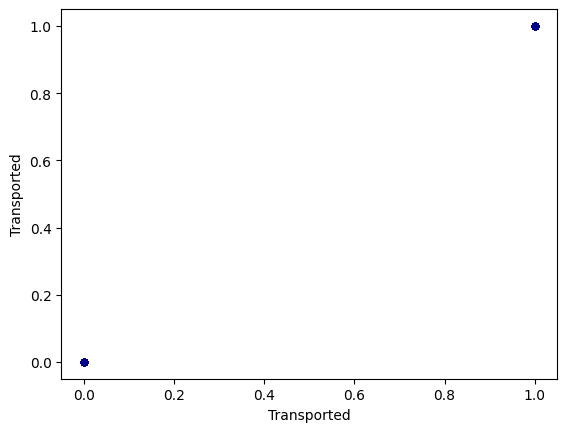

In [15]:
df.plot.scatter(x='Transported',
                      y='Transported',
                      c='DarkBlue')

In [19]:
one_hot_homeplanet = pd.get_dummies(df['HomePlanet']).astype(int)

In [22]:
one_hot_homeplanet["Transported"] = df["Transported"]

In [25]:
one_hot_homeplanet.corr()

,Earth,Europa,Mars,Transported
Earth,1.000000,-0.604411,-0.534195,-0.169019
Europa,-0.604411,1.000000,-0.287022,0.176916
Mars,-0.534195,-0.287022,1.000000,0.019544
Transported,-0.169019,0.176916,0.019544,1.000000


We noticed that people from Earth are less likely to be transported as opposed to people from Europa

#### Analysing the CryoSleep column

In [47]:
df["CryoSleep"].isna().sum() ## Many missing values

217

In [58]:
df_no_na_cryo_sleep = df[~df["CryoSleep"].isna()]

In [59]:
df_no_na_cryo_sleep = df_no_na_cryo_sleep[["Transported", "CryoSleep"]]

In [60]:
df_no_na_cryo_sleep["CryoSleep"] = df_no_na_cryo_sleep["CryoSleep"].astype(int)

In [61]:
df_no_na_cryo_sleep

,Transported,CryoSleep
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
8688,0,0
8689,0,1
8690,1,0
8691,0,0


In [62]:
df_no_na_cryo_sleep.corr()

,Transported,CryoSleep
Transported,1.000000,0.468645
CryoSleep,0.468645,1.000000


A very strong correlation between being in a cryosleep and being transported